In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

class Izh:
    def __init__(self, neuron_type):
        self.neuron_type = neuron_type
        self.spike_times = np.array([])

        if self.neuron_type == "RS":
            self.a = 0.03
            self.b = -2.
            self.vreset=-50.  #also called 'c'
            self.d=100.0
            self.k=0.7
            self.vr=-60.
            self.vt=-40.
            self.vpeak=35.
            self.E=0.
            self.V0=-60.
            self.u0=0.
            self.C=100.


        elif self.neuron_type == "MSN":
            self.a = 0.01
            self.b = -20.
            self.vreset=-55.
            self.d=150.
            self.k=1.
            self.vr=-80.
            self.vt=-25.
            self.vpeak=40.
            self.E=70.
            self.V0=-60.
            self.u0=0.
            self.C=50.


        self.reset_state_variables () # For u, v. temp, post arrays: They get their own method in case we want to reset
                                        #  them directly withough recreating a new instance,
                                        #e.g., if we want to run more   than 1 trial in the experiment
        self.noise_mean = 0
        self.noise_std = 10
        self.epsilon= np.random.normal(self.noise_mean, self.noise_std, size=tMax)
        #self.sigma = 25 #adjusts the epsilon noise magnitudeself.sigma = 15 #adjusts the epsilon noise magnitude
        self.sigma = 0 #adjusts the epsilon noise magnitude, e.g., ALMprep.sigma=15

    def reset_state_variables (self):  #see comment in self.reset_state.. above .
        self.v = np.full(tMax, self.vr)
        self.u = np.full(tMax, self.u0)
        self.tempa= np.zeros(tMax)   #tempa holds the alpha values generated by the latest spike
        self.post = np.zeros(tMax)  #post keeps running total of the tempa values for a given neuron

    def stimulate(self, Stim):   #SOMAT neuron passes Sample array as Stim, t=1000 to 2000.
                                 #PPN neuron passes Go_cue as Stim, t =3000-3200
        for i in range(tMax - 1):
          
            self.v[i + 1] = self.v[i] +  (self.k * (self.v[i] - self.vr) * (self.v[i] - self.vt)
                    - self.u[i] + self.E + Stim[i]  + self.sigma * self.epsilon[i]) / self.C
            self.u[i + 1] = self.u[i] + self.a * (self.b * (self.v[i] - self.vr) - self.u[i])
            if self.v[i + 1] >= self.vpeak:
                
                # #########
                # print(f'spiking at {i} ==== vpeak at {i=} and vreset at {i+1=}')
                # #########
                self.v[i] = self.vpeak
                self.v[i + 1] = self.vreset
                self.u[i + 1] = self.u[i + 1] + self.d
                if i < tMax - alphaMax+1:
                    self.tempa = np.concatenate((np.zeros(i), alpha_values, np.zeros(tMax - alphaMax - i)))
                    self.post += self.tempa
                self.spike_times = np.append(self.spike_times, i)
          
            n=self
            v0=float(n.v[i])
            u0=float(n.u[i])
            input = Stim[i]
            v1 = float(n.v[i+1])
            u1 = float(n.u[i+1])
            if 0<=i<10:
                print(f'time | (V0,u0) | input | (V1,u1)')
                print(f'{i} | {v0:.5f}, {u0:.5f} | {input:.5f} | {v1:.5f}, {u1:.5f}')
        

    def CTC_BG_Circuit (self, Somat_ALMprep_wt,  Somat_MSNinstr_wt, MSNinstr_SNRinstr_wt, SNRinstr_VMprep_wt, VMprep_ALMprep_wt, ALMprep_VMprep_wt, ALMprep_MSNprep_wt,
                MSNprep_SNRprep_wt, SNRprep_VMresp_wt, PPN_THAL_GO_wt, THAL_GO_ALM_INTER_wt, ALM_INTER_ALMprep_wt, THAL_GO_ALMresp_wt,
                ALMresp_MSNresp_wt, MSNresp_SNR3_wt, SNR3_VMresp_wt, VMresp_ALMresp_wt, ALMresp_VMresp_wt):

        for i in range(tMax - 1):

            #Somat.post is calculated in Somat.stimulate function
            MSNinstr.v[i+1] = MSNinstr.v[i]+(MSNinstr.k * (MSNinstr.v[i] - MSNinstr.vr) * (MSNinstr.v[i] - MSNinstr.vt)
                - MSNinstr.u[i] + MSNinstr.E +  Somat.post[i]*Somat_MSNinstr_wt
                + MSNinstr.sigma * MSNinstr.epsilon[i]) / MSNinstr.C
            MSNinstr.u[i + 1] = MSNinstr.u[i] + MSNinstr.a * (MSNinstr.b * (MSNinstr.v[i] - MSNinstr.vr) - MSNinstr.u[i])
    

            n=MSNinstr
            v0=float(n.v[i])
            u0=float(n.u[i])
            input = Somat.post[i]*Somat_MSNinstr_wt
            v1 = float(n.v[i+1])
            u1 = float(n.u[i+1])
            if 1028<=i<1035:
                # print(f'time | (V0,u0) ... + input ... = (V1,u1)')
                print(f'{i} | {v0:.5f}, {u0:.5f} --> {input:.5f} --> {v1:.5f}, {u1:.5f}')
                # print(f'{i} | {v0:.5f}, {u0:.5f} | {input:.5f} | {v1:.5f}, {u1:.5f}')
    
            #if 1001 <= i + 1 <= 2000:
                #MSNinstr.v[i + 1] = MSNinstr.vr
            if MSNinstr.v[i + 1] >= MSNinstr.vpeak:
                MSNinstr.spike_and_output(i)
                # v2pre=float(n.v[i])
                # v2post=float(n.v[i+1])
                # print('spiked')
                # print(f'values of v[t] and v[t+1] after spiking: {v0}, {v1}')




            SNRinstr.v[i+1] = SNRinstr.v[i]+(SNRinstr.k * (SNRinstr.v[i] - SNRinstr.vr) * (SNRinstr.v[i] - SNRinstr.vt)
                - SNRinstr.u[i] + SNRinstr.E - MSNinstr.post[i]*MSNinstr_SNRinstr_wt
                + SNRinstr.sigma * SNRinstr.epsilon[i]) / SNRinstr.C
            SNRinstr.u[i + 1] = SNRinstr.u[i] + SNRinstr.a * (SNRinstr.b * (SNRinstr.v[i] - SNRinstr.vr) - SNRinstr.u[i])
            if SNRinstr.v[i + 1] >= SNRinstr.vpeak:
                 SNRinstr.spike_and_output(i)
                #  print(i)

            VMprep.v[i+1] = VMprep.v[i]+(VMprep.k * (VMprep.v[i] - VMprep.vr) * (VMprep.v[i] - VMprep.vt)
                - VMprep.u[i] + VMprep.E +  ALMprep.post[i]*ALMprep_VMprep_wt - (SNRinstr.post[i] * SNRinstr_VMprep_wt)
                + VMprep.sigma * VMprep.epsilon[i]) / VMprep.C
            VMprep.u[i + 1] = VMprep.u[i] + VMprep.a * (VMprep.b * (VMprep.v[i] - VMprep.vr) - VMprep.u[i])
            #PHOTOINHIBI [Delay-period silencing] BETWEEEN 2000-3000
            #if 2001 <= i + 1 <= 3000:
            #    VMprep.v[i + 1] = VMprep.vrs

            if VMprep.v[i + 1] >= VMprep.vpeak:
                VMprep.spike_and_output(i)

            ALMprep.v[i + 1] = ALMprep.v[i] + (ALMprep.k * (ALMprep.v[i] - ALMprep.vr) * (ALMprep.v[i] - ALMprep.vt)
                - ALMprep.u[i] + ALMprep.E  + Somat.post[i]*Somat_ALMprep_wt+ VMprep.post[i]*VMprep_ALMprep_wt - ALM_INTER.post[i]*ALM_INTER_ALMprep_wt
                + ALMprep.sigma * ALMprep.epsilon[i]) / ALMprep.C
            ALMprep.u[i + 1] = ALMprep.u[i] + ALMprep.a * (ALMprep.b * (ALMprep.v[i] - ALMprep.vr) - ALMprep.u[i])
            #PHOTOINHIBI [Delay-period silencing] BETWEEEN 2000-3000
            #if 2001 <= i + 1 <= 3000:
            #    ALMprep.v[i + 1] = ALMprep.vr
            #
            #PHOTOINHIB [SILENCING]] during RESPONSE PERIOD
            #if 3001 <= i + 1 <= 3200:
            #   ALMprep.v[i + 1] = ALMprep.vr

            if ALMprep.v[i + 1] >= ALMprep.vpeak:
                ALMprep.spike_and_output (i)

            MSNprep.v[i+1] = MSNprep.v[i]+(MSNprep.k * (MSNprep.v[i] - MSNprep.vr) * (MSNprep.v[i] - MSNprep.vt)
                - MSNprep.u[i] + MSNprep.E +  ALMprep.post[i]*ALMprep_MSNprep_wt
                + MSNprep.sigma * MSNprep.epsilon[i]) / MSNprep.C
            MSNprep.u[i + 1] = MSNprep.u[i] + MSNprep.a * (MSNprep.b * (MSNprep.v[i] - MSNprep.vr) - MSNprep.u[i])
            if MSNprep.v[i + 1] >= MSNprep.vpeak:
                MSNprep.spike_and_output(i)

            SNRprep.v[i+1] = SNRprep.v[i]+(SNRprep.k * (SNRprep.v[i] - SNRprep.vr) * (SNRprep.v[i] - SNRprep.vt)
                - SNRprep.u[i] + SNRprep.E -MSNprep.post[i]*MSNprep_SNRprep_wt
                + SNRprep.sigma * SNRprep.epsilon[i]) / SNRprep.C
            SNRprep.u[i + 1] = SNRprep.u[i] + SNRprep.a * (SNRprep.b * (SNRprep.v[i] - SNRprep.vr) - SNRprep.u[i])
            if SNRprep.v[i + 1] >= SNRprep.vpeak:
                 SNRprep.spike_and_output(i)

            THAL_GO.v[i+1] = THAL_GO.v[i]+(THAL_GO.k * (THAL_GO.v[i] - THAL_GO.vr) * (THAL_GO.v[i] - THAL_GO.vt)
                - THAL_GO.u[i] + THAL_GO.E + PPN.post[i]*PPN_THAL_GO_wt
                + THAL_GO.sigma * THAL_GO.epsilon[i]) / THAL_GO.C
            THAL_GO.u[i + 1] = THAL_GO.u[i] + THAL_GO.a * (THAL_GO.b * (THAL_GO.v[i] - THAL_GO.vr) - THAL_GO.u[i])
            if THAL_GO.v[i + 1] >= THAL_GO.vpeak:
                 THAL_GO.spike_and_output(i)

            ALM_INTER.v[i+1] = ALM_INTER.v[i]+(ALM_INTER.k * (ALM_INTER.v[i] - ALM_INTER.vr) * (ALM_INTER.v[i] - ALM_INTER.vt)
                - ALM_INTER.u[i] + ALM_INTER.E + THAL_GO.post[i]*THAL_GO_ALM_INTER_wt
                + ALM_INTER.sigma * ALM_INTER.epsilon[i]) / ALM_INTER.C
            ALM_INTER.u[i + 1] = ALM_INTER.u[i] + ALM_INTER.a * (ALM_INTER.b * (ALM_INTER.v[i] - ALM_INTER.vr) - ALM_INTER.u[i])
            if ALM_INTER.v[i + 1] >= ALM_INTER.vpeak:
                 ALM_INTER.spike_and_output(i)


            VMresp.v[i+1] = VMresp.v[i]+(VMresp.k * (VMresp.v[i] - VMresp.vr) * (VMresp.v[i] - VMresp.vt)
                - VMresp.u[i] + VMresp.E +  (ALMresp.post[i]*ALMresp_VMresp_wt) - (SNRprep.post[i] * SNRprep_VMresp_wt) - (SNR3.post[i] * SNR3_VMresp_wt)
                + VMresp.sigma * VMresp.epsilon[i]) / VMresp.C
            VMresp.u[i + 1] = VMresp.u[i] + VMresp.a * (VMresp.b * (VMresp.v[i] - VMresp.vr) - VMresp.u[i])
            if VMresp.v[i + 1] >= VMresp.vpeak:
                VMresp.spike_and_output(i)

            ALMresp.v[i + 1] = ALMresp.v[i] + (ALMresp.k * (ALMresp.v[i] - ALMresp.vr) * (ALMresp.v[i] - ALMresp.vt)
                - ALMresp.u[i] + ALMresp.E  + THAL_GO.post[i]*THAL_GO_ALMresp_wt   + VMresp.post[i]*VMresp_ALMresp_wt + ALMresp.sigma * ALMresp.epsilon[i]) / ALMresp.C
            ALMresp.u[i + 1] = ALMresp.u[i] + ALMresp.a * (ALMresp.b * (ALMresp.v[i] - ALMresp.vr) - ALMresp.u[i])
            #PHOTOINHIB [silencing] during RESPONSE PERIOD
            #if 3001 <= i + 1 <= 3200:
            #   ALMresp.v[i + 1] = ALMresp.vr

            if ALMresp.v[i + 1] >= ALMresp.vpeak:
                ALMresp.spike_and_output (i)

            MSNresp.v[i+1] = MSNresp.v[i]+(MSNresp.k * (MSNresp.v[i] - MSNresp.vr) * (MSNresp.v[i] - MSNresp.vt)
                - MSNresp.u[i] + MSNresp.E  + ALMresp.post[i]*ALMresp_MSNresp_wt
                + MSNresp.sigma * MSNresp.epsilon[i]) / MSNresp.C
            MSNresp.u[i + 1] = MSNresp.u[i] + MSNresp.a * (MSNresp.b * (MSNresp.v[i] - MSNresp.vr) - MSNresp.u[i])
            if MSNresp.v[i + 1] >= MSNresp.vpeak:
                MSNresp.spike_and_output(i)

            SNR3.v[i+1] = SNR3.v[i]+(SNR3.k * (SNR3.v[i] - SNR3.vr) * (SNR3.v[i] - SNR3.vt)
                - SNR3.u[i] + SNR3.E - (MSNresp.post[i]*MSNresp_SNR3_wt)
                + SNRprep.sigma * SNRprep.epsilon[i]) / SNRprep.C
            SNR3.u[i + 1] = SNR3.u[i] + SNR3.a * (SNR3.b * (SNR3.v[i] - SNR3.vr) - SNR3.u[i])
            if SNR3.v[i + 1] >= SNR3.vpeak:
                 SNR3.spike_and_output(i)



    def spike_and_output (self, i):
        self.v[i] = self.vpeak
        self.v[i + 1] = self.vreset
        self.u[i + 1] += self.d
        if i < tMax - 251:
            self.tempa = np.concatenate((np.zeros(i), alpha_values, np.zeros(tMax - alphaMax - i)))
            self.post += self.tempa
        self.spike_times = np.append(self.spike_times, i)


    def plot_membrane_potential(self, plot_neuron, plot_start=0, plot_end=4750, **kwargs):
        #**kwargs ('key word arguments') lets you to pass any  number of keyword arguments to a function.
        # -- without defining them in the function's parameter list
        plt.figure(figsize=(4, 4))  # figure size-- Horiz,Vertical
        ax1=plt.subplot(3, 1, 1)
        plt.plot(np.arange(1, tMax+1), self.v)
        plt.axis([plot_start, plot_end, -100, 100])
        # Extract the additional parameter name and value
        if kwargs:
            param_name, param_value = list(kwargs.items())[0]
            #kwargs is a dictionary of all keyword arguments passed to the function
            #if there are any keyword arguments,  kwargs.items() returns a view object that displays a list of the dictionary's key-value tuple pairs.
            # For example, if kwargs is {'MSNinstr_SNRinstr': 50}, then kwargs.items() will return dict_items([('MSNinstr_SNRinstr', 50)]).
            title = f"{plot_neuron}: {param_value}"
            #title = f"{plot_neuron}: {param_name}={param_value}"
        else:
            title = f"{plot_neuron}"
        plt.title(title)
        #plt.xlabel("Time")
        plt.ylabel("Potential (mV)")
    #    ax1.axhline(y=80, xmin=Sample_start/(tMax-alphaMax), xmax=Sample_end/(tMax-alphaMax), color='r', ls='--',label='Sample')
        plt.hlines(y = 80, xmin = 1000, xmax = 2000, color = 'r', linestyle = '--', linewidth = 2)
        plt.show()

    def plot_alpha(self, plot_neuron, plot_start=0, plot_end=4750):
        plt.figure(figsize=(2, 2))  # figure size-- Horiz,Vertical
        plt.subplot(3, 1, 2)
        plt.plot(np.arange(1, tMax+1), self.post)
        plt.axis([plot_start, plot_end, -5, 7])
        plt.title(f"{plot_neuron}: Alpha Values")
        #plt.xlabel("Time")
        plt.ylabel("Alpha output")
        plt.show()

#------------------ANALYSES
# SPIKES PER BIN
    def spikes_per_bin (self, neuron_name='', bin_size=1000):
        bin_edges = np.arange(0, tMax, bin_size)
        spike_counts, _ = np.histogram(self.spike_times, bin_edges)
        formatted_counts = ';'.join(map(str, spike_counts)) + ';'  # Convert counts to semicolon-separated format
        # print()
        print(f"{neuron_name}, bins = {bin_size}")
        print(f"{formatted_counts};")
        #print(f"rates = {spike_counts*1000/bin_size}")


print('run define 2')

tMax=5000
W_Sample = 150
W_go = 850
Somat_MSNinstr = 220
Somat_ALMprep = 40

Somat=Izh ('RS')
Somat.sigma=0 #--------------------------sigma----------
MSNinstr=Izh('MSN')
MSNprep=Izh('MSN')
MSNresp=Izh ('MSN')
SNRinstr = Izh ('RS')
SNRinstr.E=120  #return to 120
SNRinstr.sigma=0 #------------------sigma
SNRprep=Izh('RS')
SNRprep.E=120 #120
#108-132 good
SNRprep.sigma=0 #------------------sigma


SNR3=Izh('RS')
SNR3.E=120  
ALMprep=Izh('RS')
# ALMprep.sigma=15
ALMprep.E=0  #see values below,
ALMresp= Izh('RS')

VMprep=Izh('RS')
VMprep.sigma=0 #------------------sigma

VMresp=Izh('RS')
VMresp.sigma=0 #------------------sigma
PPN=Izh ('RS')  #baseline firing = 20 Hz; evoked response= 80-100Hz (lat = 10 ms)
PPN.E=100  #originally 85 (18Hz) (See JH PPN obsid)
THAL_GO=Izh('RS')  #Respond to go signal in about 17ms; BASELINE= 17Hz; Evoked = 40Hz
ALM_INTER=Izh('RS') #EXC Response to GO signal in about 25 ms;


run define 2


In [14]:
MSNinstr_SNRinstr=90 #90
SNRinstr_VMprep =10 #10
VMprep_ALMprep=70  # 70;
ALMprep_VMprep=80 
ALMprep_MSNprep=320 #320
MSNprep_SNRprep=50
SNRprep_VMresp=100 #NEW 100
PPN_THAL_GO=60; #60; 45 weight evokes THAL_GO of 40 Hz response on top of about 15 Hz background rate)
THAL_GO_ALM_INTER = 55   #55;   originally 40, which evokes 40 Hz w background of 0; #50 evokes 40 hz w background of 10;
ALM_INTER_ALMprep = 50 #50 originally 40
THAL_GO_ALMresp=30 #30
ALMresp_MSNresp=320 #320
MSNresp_SNR3=90  #HERE 90
SNR3_VMresp=50   # 50
VMresp_ALMresp=85 #85
ALMresp_VMresp=90  #originally 90;

alphaMax=250
td = np.arange(1, alphaMax+1)
L=30
alpha_values = td/L * np.exp((L-td)/L)

Sample = np.zeros(tMax)
Go_cue= np.zeros(tMax)
Sample_start = 1000
Sample_end = 2000

Sample [Sample_start:Sample_end] = W_Sample
Go_start=3000
Go_end=3100
Go_cue [Go_start:Go_end] = W_go

Somat.stimulate(Sample)  #Stim neuron and record membrane potential and alpha values
                        # v and u arrays fill for tMax
PPN.stimulate(Go_cue)

"""RUN CIRCUIT"""

ALMprep.CTC_BG_Circuit (
    Somat_ALMprep_wt=Somat_ALMprep,
    Somat_MSNinstr_wt= Somat_MSNinstr,  #threshold weights is about 50
    MSNinstr_SNRinstr_wt= MSNinstr_SNRinstr,
    SNRinstr_VMprep_wt=  SNRinstr_VMprep,
    VMprep_ALMprep_wt= VMprep_ALMprep,
    ALMprep_VMprep_wt= ALMprep_VMprep,
    ALMprep_MSNprep_wt=ALMprep_MSNprep,
    MSNprep_SNRprep_wt= MSNprep_SNRprep,
    SNRprep_VMresp_wt=SNRprep_VMresp,
    PPN_THAL_GO_wt=PPN_THAL_GO,
    THAL_GO_ALM_INTER_wt=THAL_GO_ALM_INTER,
    ALM_INTER_ALMprep_wt =ALM_INTER_ALMprep,
    THAL_GO_ALMresp_wt=THAL_GO_ALMresp,
    ALMresp_MSNresp_wt=ALMresp_MSNresp,
    MSNresp_SNR3_wt=MSNresp_SNR3,
    SNR3_VMresp_wt=SNR3_VMresp,
    VMresp_ALMresp_wt=VMresp_ALMresp,
    ALMresp_VMresp_wt=ALMresp_VMresp)


time | (V0,u0) | input | (V1,u1)
0 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
1 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
2 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
3 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
4 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
5 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
6 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
7 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
8 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
9 | -60.00000, 0.00000 | 0.00000 | -60.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
0 | -60.00000, 0.00000 | 0.00000 | -59.00000, 0.00000
time | (V0,u0) | input | (V1,u1)
1 | -59.00

In [3]:
MSNinstr.v[1028:1032]

array([-77.87209276, -77.8720827 , -77.4864617 , -77.12888952])

Sample: 150 SNR background: 120 ; PPN background= 100
ALM_prep is an RS neuron
Weights:
Somat_ALM:40; Somat_MSNinstr:220;MSNinstr_SNRinstr 90; SNRinstr_VMprep:10; VMprep_ALMprep:70;  ALMprep_VMprep:80;   ALMprep_MSNprep:320; MSNprep_SNRprep: 50;  SNRprep_VMresp: 100; PPN_THAL_GO:60; THAL_GO_ALM_INTER:55
ALM_INTER_ALMprep:50; ALMresp_MSNresp:320; SNR3_VMresp:50

Spike latency from Go-cue onset


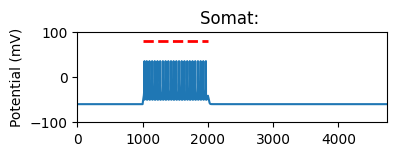

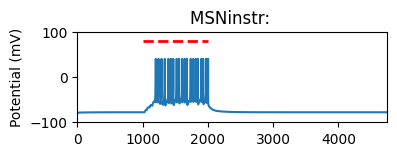

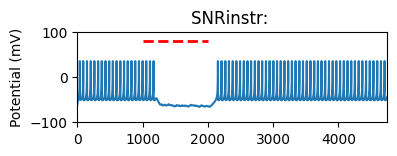

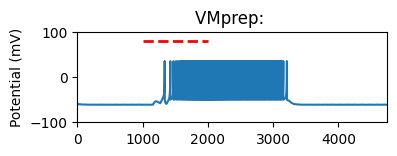

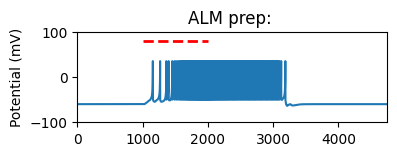

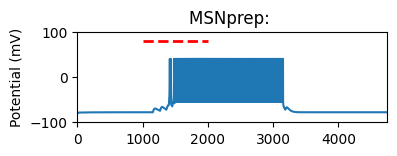

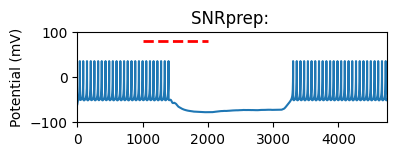

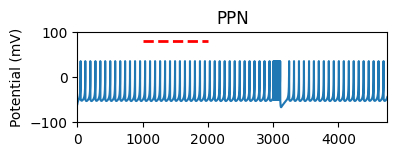

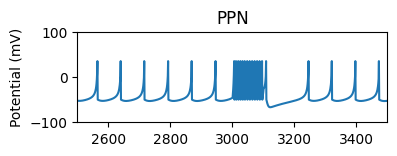

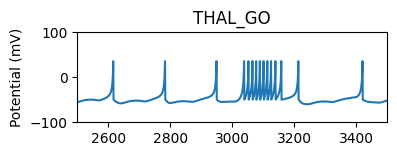

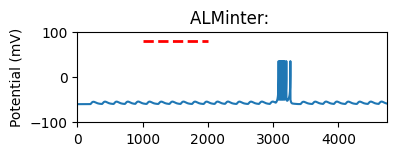

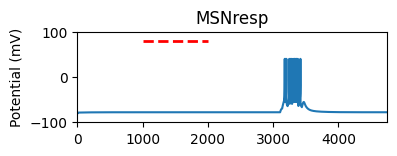

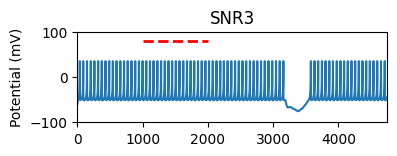

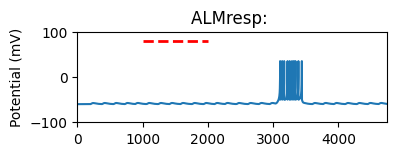

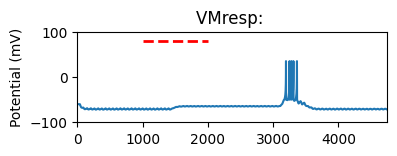

Somat, bins = 1000
0;24;0;0;;
MSNinstr, bins = 1000
0;19;1;0;;
SNRinstr, bins = 1000
17;4;15;18;;
VMprep, bins = 1000
0;35;61;10;;
ALMprep, bins = 1000
0;38;59;8;;
MSNprep, bins = 1000
0;63;103;13;;
SNRprep, bins = 1000
17;8;0;13;;
PPN, bins = 1000
13;13;13;24;;
THAL_GO, bins = 1000
5;6;6;15;;
ALM_INTER, bins = 1000
0;0;0;8;;
MSNresp, bins = 1000
0;0;0;13;;
SNR3, bins = 1000
17;18;18;11;;
ALM_resp, bins = 1000
0;0;0;10;;
VMresp, bins = 1000
0;0;0;5;;


In [15]:
# DESCRIPTION---------------------
label=''
#print('3.27.24c')
print('Sample:',W_Sample, 'SNR background:', SNRinstr.E, '; PPN background=',PPN.E)

print (f'ALM_prep is an {ALMprep.neuron_type} neuron')

print("Weights:")
print(f"Somat_ALM:{Somat_ALMprep}; Somat_MSNinstr:{Somat_MSNinstr};MSNinstr_SNRinstr {MSNinstr_SNRinstr}; SNRinstr_VMprep:{SNRinstr_VMprep}; VMprep_ALMprep:{VMprep_ALMprep};\
  ALMprep_VMprep:{ALMprep_VMprep};   ALMprep_MSNprep:{ALMprep_MSNprep}; MSNprep_SNRprep: {MSNprep_SNRprep};  SNRprep_VMresp: {SNRprep_VMresp}; PPN_THAL_GO:{PPN_THAL_GO}; THAL_GO_ALM_INTER:{THAL_GO_ALM_INTER}")
print(f"ALM_INTER_ALMprep:{ALM_INTER_ALMprep}; ALMresp_MSNresp:{ALMresp_MSNresp}; SNR3_VMresp:{SNR3_VMresp}")


print()
# ANALYSES------------------
from IPython.display import HTML

#print("SPIKE LATENCY from sample onset  (ms)")
#ALMprep_lat=ALMprep.spike_times[0] - Sample_start  #latency from sample to 1st ALMprep spike w no noise)
#print("ALMprep:", ALMprep_lat)

print ("Spike latency from Go-cue onset")
#ALM_INTER_lat=ALM_INTER.spike_times[0]-Go_start  #with no noise
#ALMResp_lat=ALMresp.spike_times[0]-Go_start  #with no noise
#VMResp_lat=VMresp.spike_times[0]-Go_start  #with no noise

#print ("VMResp:", VMResp_lat)
SNR3_lat=SNR3.spike_times[0]-Go_start  #with no noise
#print ("SNR3:", SNR3_lat)


#print ("SPIKE OFFSET relative to Go cue onset (ms)")
#ALMprep_off=max(ALMprep.spike_times-Go_start)  #with no noise
#print("ALMprep:", ALMprep_off)



#____________PLOT__________________________________



Somat.plot_membrane_potential(plot_neuron="Somat", label=label)
#Somat.plot_alpha(plot_neuron="Somat")

MSNinstr.plot_membrane_potential(plot_neuron="MSNinstr", label=label)
#VMprep.plot_alpha(plot_neuron="VMprep")

SNRinstr.plot_membrane_potential(plot_neuron="SNRinstr", label=label)
#SNRinstr.plot_membrane_potential(plot_neuron="SNRinstr", Somat_MSNinstr=Somat_MSNinstr)
#SNR.plot_alpha(plot_neuron="SNR")

VMprep.plot_membrane_potential(plot_neuron="VMprep", label=label)
#VMprep.plot_alpha(plot_neuron="VMprep")

ALMprep.plot_membrane_potential(plot_neuron="ALM prep", label=label)
#ALM.plot_alpha(plot_neuron="ALM")

#ALMprep.plot_membrane_potential(plot_neuron="ALM prep", plot_start=2600, plot_end=3400)

MSNprep.plot_membrane_potential(plot_neuron="MSNprep", label=label)

SNRprep.plot_membrane_potential(plot_neuron="SNRprep", label=label)

PPN.plot_membrane_potential(plot_neuron="PPN")

PPN.plot_membrane_potential(plot_neuron="PPN",  plot_start=2500, plot_end=3500)
#PPN.plot_alpha(plot_neuron="PPN",  plot_start=3000, plot_end=3500)

THAL_GO.plot_membrane_potential(plot_neuron="THAL_GO",  plot_start=2500, plot_end=3500)
#THAL_GO.plot_alpha(plot_neuron="THAL_GO")

ALM_INTER.plot_membrane_potential(plot_neuron="ALMinter", label=label)
#ALM_INTER.plot_membrane_potential(plot_neuron="ALMinter",  plot_start=2500, plot_end=3500)
#ALM_INTER.plot_alpha(plot_neuron="ALMinter")


MSNresp.plot_membrane_potential(plot_neuron="MSNresp")

SNR3.plot_membrane_potential(plot_neuron="SNR3")

ALMresp.plot_membrane_potential(plot_neuron="ALMresp", label=label)
#ALMresp.plot_membrane_potential(plot_neuron="ALMresp", label=label)
VMresp.plot_membrane_potential(plot_neuron="VMresp", label=label)


#_____________ SPIKES PER BIN___________________________________
bs=1000
Somat.spikes_per_bin (neuron_name="Somat", bin_size=bs)
MSNinstr.spikes_per_bin (neuron_name="MSNinstr", bin_size=bs)
SNRinstr.spikes_per_bin (neuron_name="SNRinstr", bin_size=bs)
# Original spikes per 500ms= 8 8 6 0 5 8 8 8 8 8]
VMprep.spikes_per_bin (neuron_name="VMprep", bin_size=bs)
ALMprep.spikes_per_bin (neuron_name="ALMprep", bin_size=bs)
MSNprep.spikes_per_bin (neuron_name="MSNprep", bin_size=bs)
SNRprep.spikes_per_bin (neuron_name='SNRprep', bin_size=bs)
PPN.spikes_per_bin (neuron_name='PPN', bin_size=bs)
THAL_GO.spikes_per_bin (neuron_name='THAL_GO', bin_size=bs)
ALM_INTER.spikes_per_bin (neuron_name='ALM_INTER', bin_size=bs)
MSNresp.spikes_per_bin (neuron_name="MSNresp", bin_size=bs)
SNR3.spikes_per_bin (neuron_name='SNR3', bin_size=bs)
ALMresp.spikes_per_bin (neuron_name='ALM_resp', bin_size=bs)
VMresp.spikes_per_bin (neuron_name="VMresp", bin_size=bs)

#ALMresp.spikes_per_bin (neuron_name='ALMresp', bin_size=100)

#ALM_INTER.spikes_per_bin (neuron_name='ALM_INTER', bin_size=100)
